# Project 1 - For AWS ML Nanodegree Program
## AWS Machine Learning Engineer Nanodegree
## Step 1: Install Libraries

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install kaggle
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 190.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 249.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 370.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 347.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

## Step 2: Download and Visualize Kaggle Data

In [2]:
username = "teweboteshome"
key = "022c5daa00b941e214b08e59729ff5c9"

In [3]:
import json
import os

# Create the .kaggle directory in the user's home directory
!mkdir -p ~/.kaggle

# Create the kaggle.json file
!touch ~/.kaggle/kaggle.json

# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
kaggle_json_path

# Save API token the kaggle.json file
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": username, "key": key}))

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 336MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
train = pd.read_csv("train.csv", parse_dates=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
test = pd.read_csv('test.csv', parse_dates=True)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
train.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [9]:
test.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0


In [10]:
submission = pd.read_csv('sampleSubmission.csv', parse_dates=True)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [18]:
predictor = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    learner_kwargs={'ignored_columns':['casual', 'registered']}
    ).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_171408"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.98 GB / 12.67 GB (78.7%)
Disk Space Avail:   66.31 GB / 107.72 GB (61.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [20]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.108068  root_mean_squared_error      21.321891  342.203751                0.001251           0.041055            3       True         11
1   RandomForestMSE_BAG_L2  -53.461120  root_mean_squared_error      20.795212  303.857595                0.987643          46.061827            2       True         10
2          LightGBM_BAG_L2  -54.897151  root_mean_squared_error      20.332997  296.100868                0.525428          38.305100            2       True          9
3        LightGBMXT_BAG_L2  -60.669246  root_mean_squared_error      25.574495  326.426258                5.766926          68.630490            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.109061    0.053655   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-131.13848993059156),
  'WeightedEnsemble_L2': np.float64(-84.1250612

In [21]:
performance = predictor.evaluate(train)

In [22]:
performance

{'root_mean_squared_error': np.float64(-77.26146516729736),
 'mean_squared_error': -5969.333984375,
 'mean_absolute_error': -52.4292106628418,
 'r2': 0.8180652260780334,
 'pearsonr': 0.9397348690154678,
 'median_absolute_error': np.float64(-30.809070587158203)}

### Create predictions from test data

In [23]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [24]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [25]:
predictions = predictor.predict(test)

<Axes: xlabel='model'>

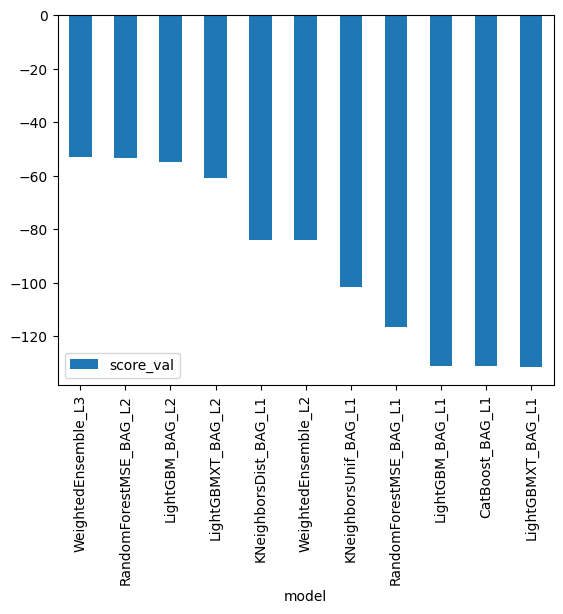

In [26]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [27]:
predictions.describe()

,count
count,6493.000000
mean,99.984947
std,89.323669
min,3.139126
25%,19.356260
50%,64.610924
75%,166.909225
max,367.959900


In [28]:
predictions = [x if x > 0 else 0 for x in predictions]

In [29]:
submission["count"] = predictions

In [30]:
submission.to_csv("submission.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 243k/243k [00:00<00:00, 1.25MB/s]
Successfully submitted to Bike Sharing Demand

In [69]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-28 18:03:48.453000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.47412      0.47412       
submission_new_features.csv  2025-05-28 17:48:47.850000  new features                       SubmissionStatus.COMPLETE  0.60782      0.60782       
submission.csv               2025-05-28 17:28:50.977000  first raw submission               SubmissionStatus.COMPLETE  1.80308      1.80308       
submission_new_hpo.csv       2025-05-27 18:12:07.387000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       


## Step 4: Exploratory Data Analysis and Creating an additional feature

In [32]:
import matplotlib.pyplot as plt

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

<Axes: >

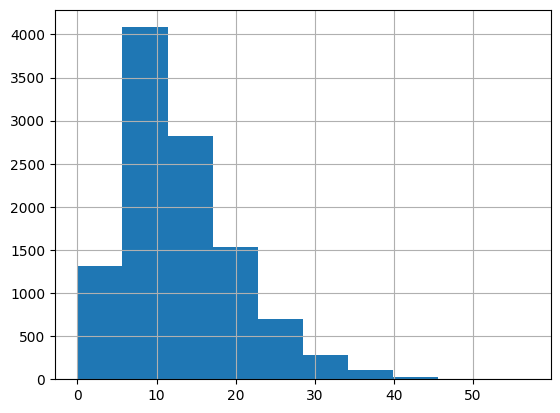

In [33]:
train.windspeed.hist()

<Axes: >

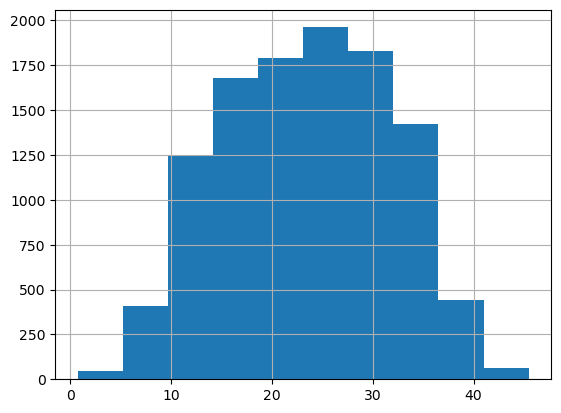

In [ ]:
train.atemp.hist()

<Axes: >

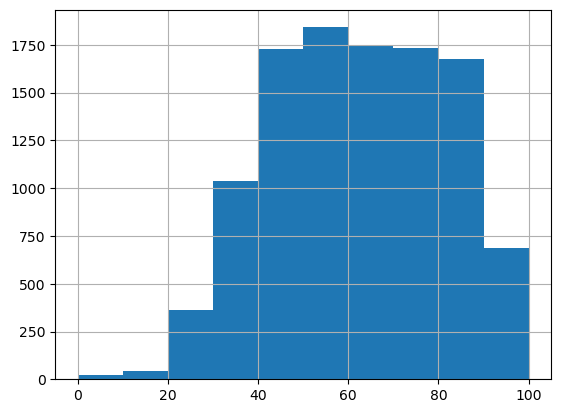

In [ ]:
train.humidity.hist()

<Axes: >

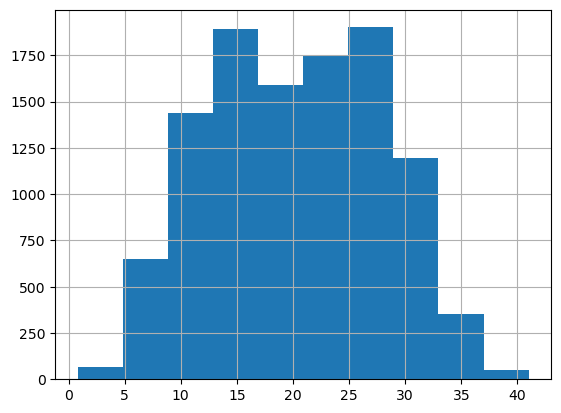

In [ ]:
train.temp.hist()

<Axes: >

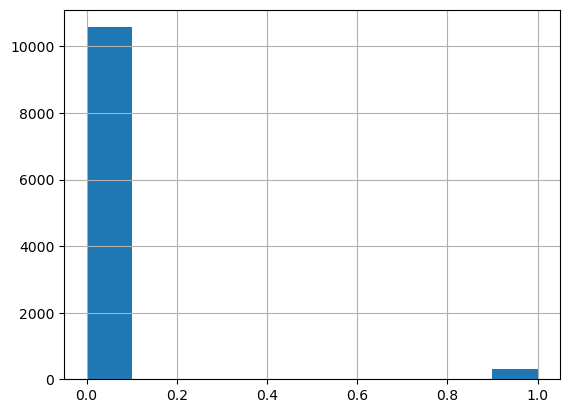

In [ ]:
train.holiday.hist()

<Axes: >

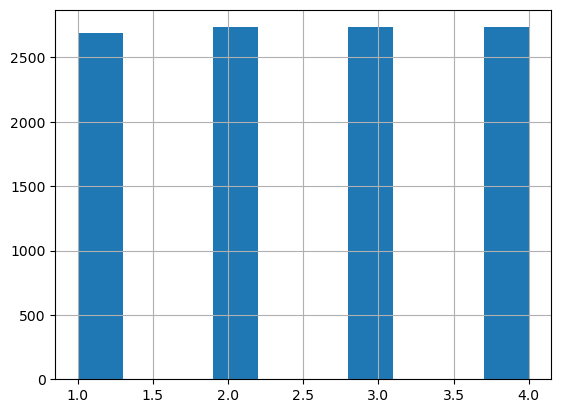

In [ ]:
train.season.hist()

In [41]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [42]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [43]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [44]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

In [45]:
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [47]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## Rerun the model with some additional data

In [48]:
predictor_new_features = TabularPredictor(
    label="count",
    eval_metric="root_mean_squared_error",
    learner_kwargs={'ignored_columns':['casual', 'registered']}
    ).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_173302"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.95 GB / 12.67 GB (78.5%)
Disk Space Avail:   65.60 GB / 107.72 GB (60.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [49]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.476412  root_mean_squared_error      40.023821  403.277124                0.000757           0.034441            3       True         11
1          LightGBM_BAG_L2  -30.793164  root_mean_squared_error      37.610125  298.614499                0.570051          42.885354            2       True          9
2        LightGBMXT_BAG_L2  -31.164793  root_mean_squared_error      38.670191  310.921876                1.630117          55.192731            2       True          8
3   RandomForestMSE_BAG_L2  -31.768639  root_mean_squared_error      37.822896  305.164598                0.782822          49.435453            2       True         10
4      WeightedEnsemble_L2  -32.394652  root_mean_squared_error      36.512865  209.124883   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': np.float64(-101.54619908446061),
  'KNeighborsDist_BAG_L1': np.float64(-84.12506123181602),
  'LightGBMXT_BAG_L1': np.float64(-34.453884062670745),
  'LightGBM_BAG_L1': np.float64(-33.91733862651761),
  'RandomForestMSE_BAG_L1': np.float64(-38.424983594881716),
  'CatBoost_BAG_L1': np.float64(-40.648540420890335),
  'WeightedEnsemble_L2': np.float64(-32.394652

In [50]:
performance = predictor_new_features.evaluate(train)

In [51]:
performance

{'root_mean_squared_error': np.float64(-14.942389972615869),
 'mean_squared_error': -223.27500915527344,
 'mean_absolute_error': -9.451534271240234,
 'r2': 0.9931949973106384,
 'pearsonr': 0.9969523805854503,
 'median_absolute_error': np.float64(-5.761364936828613)}

<Axes: xlabel='model'>

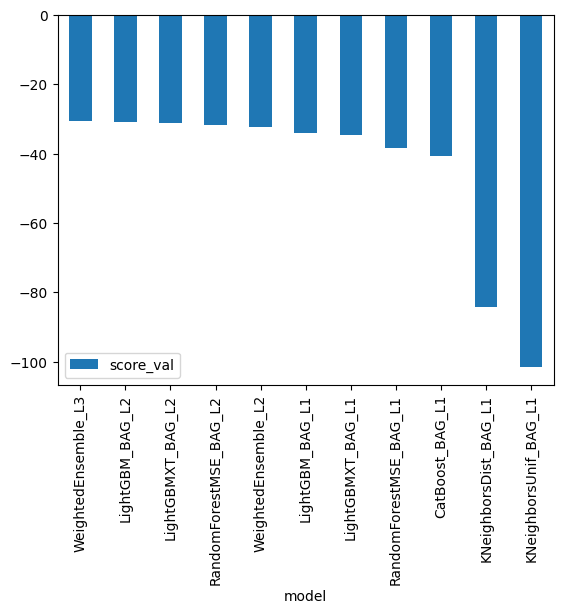

In [52]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [53]:
predictions_new_fet = predictor_new_features.predict(test)

In [54]:
predictions_new_fet.describe()

,count
count,6493.000000
mean,163.820969
std,146.020844
min,2.167173
25%,49.164040
50%,126.437851
75%,234.658966
max,821.490295


In [55]:
predictions_new_fet = [x if x > 0 else 0 for x in predictions_new_fet]

In [56]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_fet

In [57]:
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 243k/243k [00:00<00:00, 1.24MB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-28 17:48:47.850000  new features                       SubmissionStatus.COMPLETE  0.60782      0.60782       
submission.csv               2025-05-28 17:28:50.977000  first raw submission               SubmissionStatus.COMPLETE  1.80308      1.80308       
submission_new_hpo.csv       2025-05-27 18:12:07.387000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       
submission_new_features.csv  2025-05-27 17:56:04.210000  new features                       SubmissionStatus.COMPLETE  0.63043      0.63043       


## Change Hyperparameters

In [60]:
predictor_new_hpo = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns':['casual', 'registered']}
    ).fit(
    train_data=train,
    hyperparameters={
        'RF': {'n_estimators': 300, 'max_depth': 15},
        'XGB': {'learning_rate': 0.05, 'max_depth': 8},
        'CAT': {'iterations': 1000, 'learning_rate': 0.03},
        'NN_TORCH': {'num_epochs': 20},
    },
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_175043"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.86 GB / 12.67 GB (77.8%)
Disk Space Avail:   64.90 GB / 107.72 GB (60.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

In [61]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -33.691808  root_mean_squared_error       8.021948  398.726592                0.000779           0.023053            3       True          8
1    WeightedEnsemble_L2  -33.818819  root_mean_squared_error       7.047999  193.346338                0.001010           0.044993            2       True          5
2        CatBoost_BAG_L2  -33.996643  root_mean_squared_error       7.459252  362.362032                0.095497          72.993893            2       True          7
3         XGBoost_BAG_L1  -34.417861  root_mean_squared_error       5.998787   82.637089                5.998787          82.637089            1       True          3
4    RandomForest_BAG_L2  -35.022186  root_mean_squared_error       7.925672  325.709646               

{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': np.float64(-38.829463212401066),
  'CatBoost_BAG_L1': np.float64(-38.512047322180166),
  'XGBoost_BAG_L1': np.float64(-34.417861283421765),
  'NeuralNetTorch_BAG_L1': np.float64(-101.30182347398524),
  'WeightedEnsemble_L2': np.float64(-33.81881856669723),
  'RandomForest_BAG_L2': np.float64(-35.022185715386456),
  'CatBoost_BAG_L2': np.float64(-33.99664320535448),
  'WeightedEnsemble_L3': np.float64(-33.69180842702181)},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'RandomForest_BAG_L1

In [62]:
performance_hyp = predictor_new_hpo.evaluate(train)

In [63]:
performance_hyp

{'root_mean_squared_error': np.float64(-14.03270342970587),
 'mean_squared_error': -196.91677856445312,
 'mean_absolute_error': -9.141139030456543,
 'r2': 0.9939983487129211,
 'pearsonr': 0.9970341439199486,
 'median_absolute_error': np.float64(-5.656972885131836)}

In [64]:
predictions_hyp = predictor_new_hpo.predict(test)
predictions_hyp.describe()

,count
count,6493.000000
mean,192.526855
std,174.305649
min,-2.682686
25%,47.148838
50%,150.603333
75%,285.602081
max,895.513550


In [65]:
predictions_hyp = [x if x > 0 else 0 for x in predictions_hyp]

In [66]:
min(predictions_hyp)

0

In [68]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')

submission_new_hpo["count"] = predictions_hyp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 242k/242k [00:00<00:00, 1.35MB/s]
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-28 17:48:47.850000  new features                       SubmissionStatus.COMPLETE  0.60782      0.60782       
submission.csv               2025-05-28 17:28:50.977000  first raw submission               SubmissionStatus.COMPLETE  1.80308      1.80308       
submission_new_hpo.csv       2025-05-27 18:12:07.387000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       
submission_new_features.csv  2025-05-27 17:56:04.210000  new features                       SubmissionStatus.COMPLETE  0.63043      0.63043       


## **Draw line graphs**

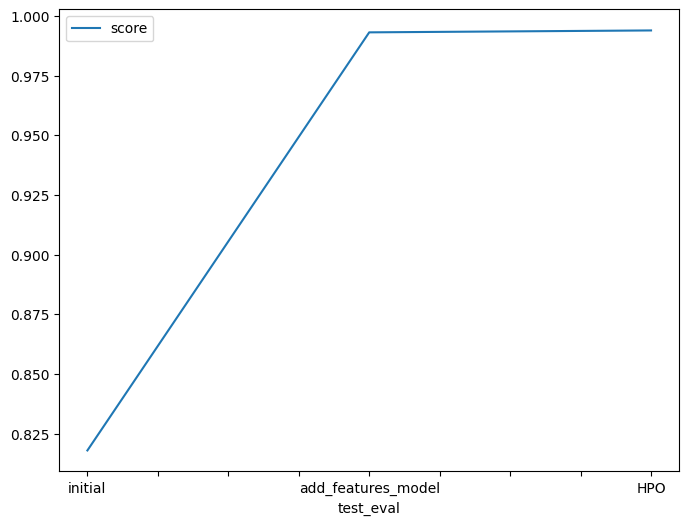

In [70]:
fig = pd.DataFrame(
    {
        'test_eval': ['initial', 'add_features_model', 'HPO'],
        'score':[0.8180, 0.9931, 0.9939]
        }
    ).plot(x='test_eval', y='score', figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

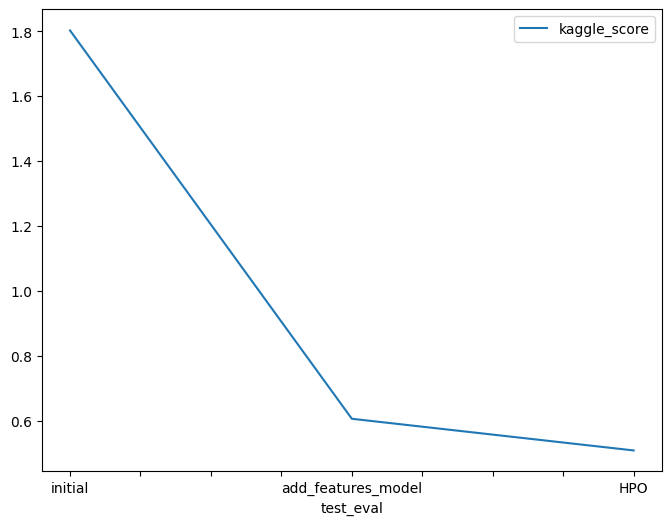

In [72]:
fig = pd.DataFrame(
    {
        'test_eval': ['initial', 'add_features_model', 'HPO'],
        'kaggle_score':[1.80308, 0.60782, 0.51037]
        }
    ).plot(x='test_eval', y='kaggle_score', figsize=(8, 6)).get_figure()
fig.savefig('kaggle_score.png')

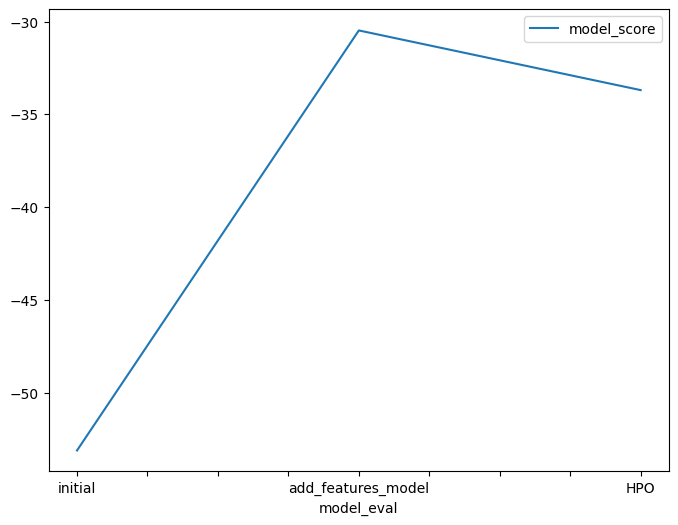

In [73]:
fig = pd.DataFrame(
    {
        'model_eval': ['initial', 'add_features_model', 'HPO'],
        'model_score':[-53.108068, -30.476412, -33.691808]
        }
    ).plot(x='model_eval', y='model_score', figsize=(8, 6)).get_figure()
fig.savefig('model_score.png')

In [ ]:
# END